#MSPA PREDICT 400

##Midterm Exam

###Question 1

A lumberyard has fixed costs of \$2,811.60 a day and variable costs of \$1 per foot of board produced. The company gets \$2.80 per foot of board sold. How many feet of board must be produced daily to break even? Solve this problem graphically, using Python.

####Answer

To answer this question, two functions are created. The first function is referred to as the 'total cost function'. This function is represented as: 

$y = 1.00x + 2811.60$

where:

$y$ represents daily total cost of board produced (\$)

$x$ represents the daily amount of board produced (feet)

The coefficient of one for the variable $x$ indicates that each foot of board produced carries with it a one dollar increase in total cost. The lumberyard's fixed costs are also accounted for as part of this function, noting that when the daily amount of board produced ($x$) is equal to zero, the function returns a daily total cost of \$2,811.60.


The second function is referred to as the 'revenue function'. This function is represented as:

$y = 2.80x$

where:

$y$ represents the daily total revenue from board produced (\$)

$x$ represents the daily amount of board sold (feet)

The coefficient of 2.80 indicates that each foot of board sold carries with is a $2.80 increase in total revenue.


In order to find how many feet of board must be produced to break even, the above two functions are plotted and their intersection is found. The intersection coordinates indicate the break even amount of daily total revenue/ cost ($y$), and the break even amount of board produced/ sold ($x$).

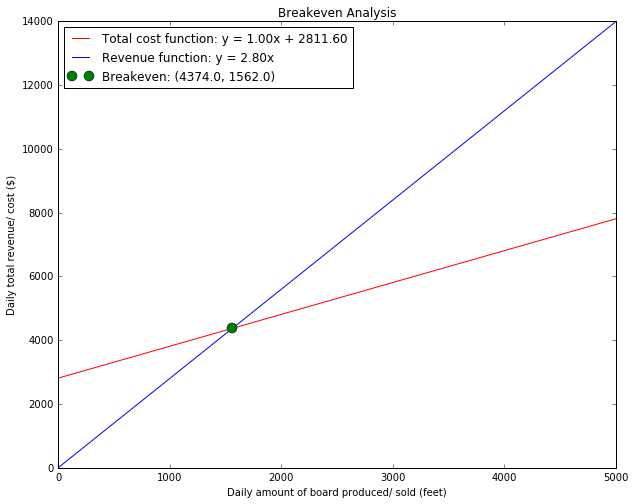

Breakeven - Daily total revenue/ cost ($): 4373.60
Breakeven - Daily amount of board produced/ sold (feet): 1562.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
%matplotlib inline

def f1(x):
    return x + 2811.60 # total cost function
def f2(x):
    return 2.80*x # revenue funtion

x = Symbol('x')
x1, = solve(f1(x)-f2(x))
y1 = f1(x1)

xr = np.linspace(0, 5000, 1000)
y1r = f1(xr)
y2r = f2(xr)

plt.figure(figsize = (10, 8))

plt.plot(xr,y1r, "r")
plt.plot(xr,y2r, "b")
plt.plot(x1, y1, "go", markersize = 10)

plt.title("Breakeven Analysis")
plt.ylabel("Daily total revenue/ cost ($)")
plt.xlabel("Daily amount of board produced/ sold (feet)")
plt.legend(("Total cost function: y = 1.00x + 2811.60", 
            "Revenue function: y = 2.80x", 
            "Breakeven: " + 
            "(" + str(round(y1,0)) + ", " + str(round(x1,0)) + ")"), loc = 2)

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("q1.png")

print("Breakeven - Daily total revenue/ cost ($):", "{:.2f}".format(y1))
print("Breakeven - Daily amount of board produced/ sold (feet):", "{:.1f}".format(x1))

###Question 2

A company has 180 sales representatives, each to be assigned to one of four marketing teams. The first team is to have three times as many members as the second team and the third team is to have twice as many members as the fourth team. How can the members be distributed among the teams?

####Answer

To answer this question using graphical means, the assignment of members to teams must be expressed as a system of inequalities which can be represented graphically within a 2D space.

Noting that the first team is to have three times as many members as the second, and the third is to have twice as many as the forth, it can be said:

$t_1 = 3t_2$

$t_3 = 2t_4$

where, $t_i$ represents the amount of members assigned to the $i^{th}$ team.

The company has 180 sales representatives which may be assigned between each of the four teams. This inequality is shown below, with the above substituted for $t_1$ and $t_3$:

$t_1 + t_2 + t_3 + t_4 <= 180$

$3t_2 + t_2 + 2t_4 + t_4 <= 180$

$4t_2 + 3t_4 <= 180$

$t_2 + 0.75t_4 <= 45$

The above represents a function with respect to the amount of members in second and forth teams, and therefore can be represented graphically within a 2D space. The full system of inequalities is shown below:

$t_2 >= 0$

$t_4 >= 0$

$t_2 + 0.75t_4 <= 45$

By substituting $t_2$ for $y$, $t_4$ for $x$ and rearranging w.r.t $y$, we obtain a system of inequalities which can be plotted:

$y >= 0$

$x >= 0$

$y <= -0.75x + 45$

The system of inequalities are shown in the plot below with a 'feasible region' representing possible combinations of team two and team four membership numbers which pay respect to the original problem statement.

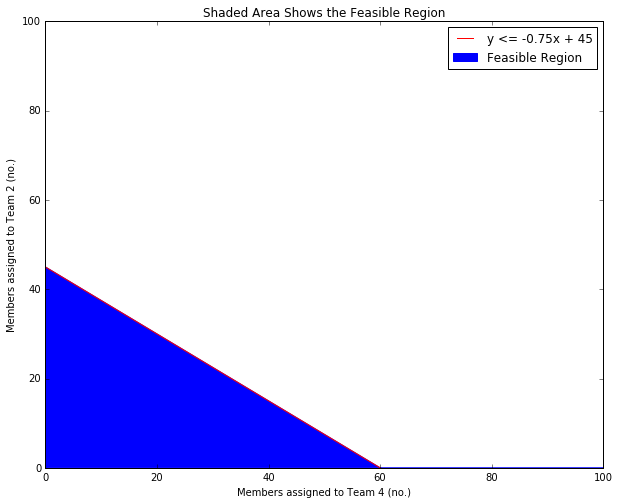

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
%matplotlib inline

# t1 = 3*t2
# t3 = 2*t4

# t1 + t2 + t3 + t4 = 180
# 3*t2 + t2 + 2*t4 + t4 = 180
# 4*t2 + 3*t4 = 180
# t2 + 0.75*t4 = 45

# y + 0.75*x = 45 # y:team 2, x:team 4
# y = -0.75*x + 45 # w.r.t y

# y >= 0
# x >= 0
# y <= -0.75*x + 45

x = np.arange(0, 200, 0.1)
y = -0.75*x + 45

plt.figure(figsize = (10, 8))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(x, y, c = "r")
plt.fill_between(x, y, where = (x>0), color = "b")

#plt.plot(0, 0, "go", markersize = 10)
#plt.plot(60, 0, "go", markersize = 10)
#plt.plot(0, 45, "go", markersize = 10)

plt.title("Shaded Area Shows the Feasible Region")
plt.ylabel("Members assigned to Team 2 (no.)")
plt.xlabel("Members assigned to Team 4 (no.)")
plt.legend(("y <= -0.75x + 45", "Feasible Region"), loc = "best")

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("q2.png")

Four possible membership assignment outcomes are shown below, all of which maximize total membership assignment (i.e. line along the function $y = -0.75x + 45$).

In [3]:
import pandas as pd

list = [0, 20,  40, 60]

resultcols = ["Team 1", 
              "Team 2", 
              "Team 3", 
              "Team 4",
              "Total Members"]

results_df = pd.DataFrame([])

def assign_t2(t4):
    t2 = -0.75*t4 + 45
    return(t2)

def assign_t13(t2, t4):
    t1 = 3*t2
    t3 = 2*t4
    return(t1, t3)

for i in list:
    t4 = i
    t2 = assign_t2(i)
    t1, t3 = assign_t13(t2, t4)
    tt = t1 + t2 + t3 + t4
    
    temp_df = pd.DataFrame([[t1, 
                             t2, 
                             t3, 
                             t4,
                             tt]], 
                           columns = resultcols)
    
    results_df = results_df.append(temp_df)

results_df.set_index([[1,2,3,4]])

,Team 1,Team 2,Team 3,Team 4,Total Members
1,135,45,0,0,180
2,90,30,40,20,180
3,45,15,80,40,180
4,0,0,120,60,180


###Question 3

The 2010 birth and death rates per million for several regions and the world population (in millions) by region are given in the tables below (see mid term test paper). Use Python to determine the total number (in millions) of births and deaths for each year.

####Answer

In [4]:
import numpy as np
import pandas as pd

births = np.asarray([
    [0.0341],
    [0.0173],
    [0.0187],
    [0.0135],
    [0.0099]
], dtype = np.float32)

deaths = np.asarray([
    [0.0115],
    [0.0073],
    [0.0058],
    [0.0083],
    [0.0102]
], dtype = np.float32)

population = np.asarray([
    [365, 2038, 284, 222, 460],
    [476, 2495, 362, 252, 484],
    [627, 2977, 442, 277, 496],
    [801, 3438, 522, 313, 514],
    [1017, 3827, 591, 344, 522]
], dtype = np.float32)

birthpop = births.T * population
birthpop = np.sum(birthpop, axis = 1)

deathpop = deaths.T * population
deathpop = np.sum(deathpop, axis = 1)

popchange = np.r_[birthpop[None,:],deathpop[None,:]]

index = ['1970', '1980', '1990', '2000', '2010']

pd.DataFrame(popchange.T, index = index, columns = ["Births (Millions)", "Deaths (Millions)"])

,Births (Millions),Deaths (Millions)
1970,60.565701,27.256702
1980,74.358109,32.815498
1990,89.798096,38.864502
2000,105.867004,45.177200
2010,121.750290,51.240005


###Question 4

Northwestern University’s basketball stadium seats 15,000 people. Front row seats cost \$8, lower level seats cost \$4, and all other seats cost \$7. The total revenue for a sellout performance is \$78,000. If half of the front row seats, half of the lower level seats and all of the other seats are sold, then the revenue is \$46,000. How many of each type of seat are there?

####Answer

To answer this question, a set of contraints and objective function must be derived. Constraints are shown below:

$8x_1 + 4x_2 + 7x_3 = 78000$

$8(0.5)x_1 + 4(0.5)x_2 + 7x_3 = 46000$

where:

$x_1$ represents the amount of front row seats sold

$x_2$ represents the amount of lower level seats sold

$x_3$ represents the amount of other seats sold

Coefficients represent ticket prices and are expressed w.r.t the total revenue from ticket sales.


The objective function is shown below:

$x_1 + x_2 + x_3 = 15000$

which pays respect to the total amount of seats available.


The above linear optimization problem can be solved using the 'pulp' package in Python.

In [5]:
from pulp import *
 
# declare variables
x1 = LpVariable("x1", 0, 99999)
x2 = LpVariable("x2", 0, 99999)
x3 = LpVariable("x3", 0, 99999)
 
# define problem
prob = LpProblem("problem", LpMinimize)

# define constraints
prob += 8*x1 + 4*x2 + 7*x3 == 78000 # revenue from sellout performance
prob += 8*0.5*x1 + 4*0.5*x2 + 7*x3 == 46000 # revenue from half sales front and lower, sellout other
 
# define objective function
prob += x1 + x2 + x3 == 15000 # total seats
 
# solve problem
prob.solve(solver = GLPK("C:\\Program Files\\glpk-4.57\\w64\\glpsol.exe"))

frSeats = round(value(x1),0)
llSeats = round(value(x2),0)
oSeats = round(value(x3),0)

print("Front row seats (no.):", frSeats)
print("Low level seats (no.):", llSeats)
print("Other seats (no.):", oSeats)

Front row seats (no.): 3000.0
Low level seats (no.): 10000.0
Other seats (no.): 2000.0


###Question 5

An airline with two types of airplanes, 737’s and 747’s, has contracted with a tour group to provide transportation for a minimum of 400 first class, 750 business class, and 1500 economy class passengers. For a certain trip, a 737 costs \$10,000 to operate and can accommodate 20 first class, 50 business class, and 110 economy class passengers. The 747 for the same trip costs \$8500 to operate and can accommodate 18 first class, 30 business class, and 44 economy class passengers. Use Python to determine how many of each type of airplane should be used to minimize the operating cost.

####Answer

To answer this question, a set of constraints and objective function must be derived. Constraints are shown below:

$x_1 >= 0$ : minimum zero 737 airplanes

$x_2 >= 0$ : minimum zero 747 airplanes

$z_1 >= 400$ : minimum 400 first class seats

$z_2 >= 750$ : minimum 750 business class seats

$z_3 >= 1500$ : minimum 1500 economy class seats

$20x_1 + 18x_2 = z_1$ : 20 first class seats per 737, 18 seats per 747

$50x_1 + 30x_2 = z_2$ : 50 business class seats per 737, 30 seats per 747

$110x_1 + 44x_2 = z_3$ : 110 economy class seats per 737, 44 seats per 747

where:

$x_1$ represents the amount of 737 airplanes

$x_2$ represents the amount of 747 airplanes

$z_1$ represents the amount of first class seats

$z_2$ represents the amount of business class seats

$z_3$ represents the amount of economy class seats


The objective function (to be minimized) is shown below:

$min(10000x_1 + 8500x_2)$

which pays respect to minimizing total operating cost.


The above linear optimization problem can be solved using the 'pulp' package in Python.

In [6]:
from pulp import *
 
# declare variables
x1 = LpVariable("x1", 0, 99999)
x2 = LpVariable("x2", 0, 99999)
z1 = LpVariable("z1", 0, 99999)
z2 = LpVariable("z2", 0, 99999)
z3 = LpVariable("z3", 0, 99999)

# define problem
prob = LpProblem("problem", LpMinimize)

# define constraints
prob += x1 >= 0 # minimum zero 737 airplanes
prob += x2 >= 0 # minimum zero 747 airplanes
prob += z1 >= 400 # minimum 400 first class seats
prob += z2 >= 750 # minimum 750 business class seats
prob += z3 >= 1500 # minimum 1500 economy class seats
prob += 20*x1 + 18*x2 == z1 # 20 first class seats per 737, 18 seats per 747
prob += 50*x1 + 30*x2 == z2 # 50 business class seats per 737, 30 seats per 747
prob += 110*x1 + 44*x2 == z3 # 110 economy class seats per 737, 44 seats per 747
 
# define objective function (to minimize)
prob += 10000*x1 + 8500*x2 # total cost
 
# solve problem
prob.solve(solver = GLPK("C:\\Program Files\\glpk-4.57\\w64\\glpsol.exe"))

no737Airp = round(value(x1),0)
no747Airp = round(value(x2),0)

print("737 airplanes (no.):", no737Airp)
print("747 airplanes (no.):", no747Airp)

minopCost = no737Airp*10000 + no747Airp*8500
print("Minimized operating cost ($):", minopCost)

def seats(a1, a2):
    s1 = 20*a1 + 18*a2
    s2 = 50*a1 + 30*a2
    s3 = 110*a1 + 44*a2
    return(s1, s2, s3)

fcSeats, bcSeats, ecSeats = seats(no737Airp, no747Airp)
print("First class seats (no.):", fcSeats)
print("Business class seats (no.):", bcSeats)
print("Economy class seats (no.):", ecSeats)

737 airplanes (no.): 9.0
747 airplanes (no.): 13.0
Minimized operating cost ($): 200500.0
First class seats (no.): 414.0
Business class seats (no.): 840.0
Economy class seats (no.): 1562.0


###Question 6

A political mailing will have several pages on the economy, the military, and the environment. The total number of these pages in the booklet should be less than 100. For the target group that will receive the booklet, market research suggests that there will be a positive impact proportional to 5 times the number of pages on the economy, a positive impact proportional to 2 times the number of pages on the military, and a negative impact proportional to -4 times the number of pages on the environment. The candidate, however, insists that the number of pages on the environment exceed the number on the military by at least 5 and that the number of pages on the economy also exceed the number on the military by at least 5. Find the number of pages that should be devoted to the economy, the military, and the environment.

####Answer

To answer this question, a set of constraints and objective function must be derived. Constraints are shown below:

$x_1 >= 0$ : minimum zero economy pages

$x_2 >= 0$ : minimum zero military pages

$x_3 >= 0$ : minimum zero environment pages

$x_3 >= x_2 + 5$ : environment pages exceed military by at least 5

$x_1 >= x_2 + 5$ : economy pages exceed military by at least 5

$x_1 + x_2 + x_3 <= 99$ : total pages less than 100

where:

$x_1$ represents the number of economy pages

$x_2$ represents the number of military pages

$x_3$ represents the number of environment pages


The objective function (to be maximized) is shown below:

$max(5x_1 + 2x_2 - 4x_3)$

which pays respect to impact score from the publication.


The above linear optimization problem can be solved using the 'pulp' package in Python.

In [7]:
from pulp import *
 
# declare variables
x1 = LpVariable("x1", 0, 99999)
x2 = LpVariable("x2", 0, 99999)
x3 = LpVariable("x3", 0, 99999)

# define problem
prob = LpProblem("problem", LpMaximize)

# define constraints
prob += x1 >= 0 # minimum zero economy pages
prob += x2 >= 0 # minimum zero military pages
prob += x3 >= 0 # minimum zero environment pages
prob += x3 >= x2 + 5 # environment pages exceed military by at least 5
prob += x1 >= x2 + 5 # economy pages exceed military by at least 5
prob += x1 + x2 + x3 <= 99 # total pages less than 100
 
# define objective function (to maximize)
prob += 5*x1 + 2*x2 - 4*x3 # impact score
 
# solve problem
prob.solve(solver = GLPK("C:\\Program Files\\glpk-4.57\\w64\\glpsol.exe"))

ecoPages = round(value(x1),0)
milPages = round(value(x2),0)
envPages = round(value(x3),0)

print("Economy pages (no.):", ecoPages)
print("Military pages (no.):", milPages)
print("Environment pages (no.):", envPages)

def impact(p1, p2, p3):
    impact = 5*p1 + 2*p2 - 4*p3
    return(impact)

impactScore = impact(ecoPages, milPages, envPages)
print("Impact score:", impactScore)

Economy pages (no.): 94.0
Military pages (no.): 0.0
Environment pages (no.): 5.0
Impact score: 450.0


###Question 7

One gram of soybean meal provides at least 2.5 units of vitamins and 5 calories. One gram of meat byproducts provides at least 4.5 units of vitamins and 3 calories. One gram of grain provides at least 5 units of vitamins and 10 calories. If a gram of soybean meal costs 7 cents, a gram of meat byproducts 8 cents, and a gram of grain 10 cents, use Python to determine what mixture of these three ingredients will provide at least 54 units of vitamins and 60 calories per serving at a minimum cost. What is that cost?

####Answer

To answer this question, a set of constraints and objective function must be derived. Constraints are shown below:

$x_1 >= 0$ : minimum zero soybean grams

$x_2 >= 0$ : minimum zero meat grams

$x_3 >= 0$ : minimum zero grain grams

$2.5x_1 + 4.5x_2 + 5x_3 >= 54$ : total vitamins at least 54

$5x_1 + 3x_2 + 10x_3 >= 60$ : total calories at least 60

where:

$x_1$ represents the amount of grams of soybean meal

$x_2$ represents the amount of gram of meat byproducts

$x_3$ represents the amount of gram of grain


The objective function (to be minimized) is shown below:

$min(7x_1 + 8x_2 + 10x_3)$

which pays respect to the total cost of the mixture.


The above linear optimization problem can be solved using the 'pulp' package in Python.

In [8]:
from pulp import *
 
# declare variables
x1 = LpVariable("x1", 0, 99999)
x2 = LpVariable("x2", 0, 99999)
x3 = LpVariable("x3", 0, 99999)

# define problem
prob = LpProblem("problem", LpMinimize)

# define constraints
prob += x1 >= 0 # minimum zero soybean grams
prob += x2 >= 0 # minimum zero meat grams
prob += x3 >= 0 # minimum zero grain grams
prob += 2.5*x1 + 4.5*x2 + 5*x3 >= 54 # total vitamins at least 54
prob += 5*x1 + 3*x2 + 10*x3 >= 60 # total calories at least 60
 
# define objective function (to minimize)
prob += 7*x1 + 8*x2 + 10*x3 # total cost
 
# solve problem
prob.solve(solver = GLPK("C:\\Program Files\\glpk-4.57\\w64\\glpsol.exe"))

soyGrams = value(x1)
metGrams = value(x2)
grnGrams = value(x3)

print("Soy (gm):", soyGrams)
print("Meat (gm):", metGrams)
print("Grain (gm):", grnGrams)

def vitcal(g1, g2, g3):
    vit = 2.5*g1 + 4.5*g2 + 5*g3
    cal = 5*g1 + 3*g2 + 10*g3
    return(vit, cal)

vitCount, calCount = vitcal(soyGrams, metGrams, grnGrams)
print("Vitamins:", vitCount)
print("Calories:", calCount)

def cost(g1, g2, g3):
    cost = 7*g1 + 8*g2 + 10*g3
    return(cost)

totalCost = cost(soyGrams, metGrams, grnGrams)
print("Total cost (cents):", totalCost)

Soy (gm): 0.0
Meat (gm): 8.0
Grain (gm): 3.6
Vitamins: 54.0
Calories: 60.0
Total cost (cents): 100.0


###Question 8

The manager of a concert hall estimates that 700 people attend each classical concert, 800 people attend each jazz concert, and 300 people attend each rock concert. In any given month, the total of the number of classical concerts and the number of jazz concerts may not exceed 10 and the number of rock concerts must be no more than 8. Furthermore, there should be twice as many rock concerts as classical concerts in any given month. How many of each type of concert should there be in a moth to maximize attendance?

####Answer

To answer this question, a set of constraints and objective function must be derived. Constraints are shown below:

$x_1 >= 0$ : minimum zero classical concerts

$x_2 >= 0$ : minimum zero jazz concerts

$x_3 >= 0$ : minimum zero rock concerts

$x_1 + x_2 <= 10$ : max 10 classical + jazz concerts

$x_3 <= 8$ : max 8 rock concerts

$2x_1 = x_3$ : twice as many rock than classical concerts

where:

$x_1$ represents the number of classical concerts

$x_2$ represents the number of jazz concerts

$x_3$ represents the number of rock concerts


The objective function (to be maximized) is shown below:

$max(700x_1 + 800x_2 + 300x_3)$

which pays respect to total attendance amount.


The above linear optimization problem can be solved using the 'pulp' package in Python.

In [9]:
from pulp import *
 
# declare variables
x1 = LpVariable("x1", 0, 99999)
x2 = LpVariable("x2", 0, 99999)
x3 = LpVariable("x3", 0, 99999)

# define problem
prob = LpProblem("problem", LpMaximize)

# define constraints
prob += x1 >= 0 # minimum zero classical concerts
prob += x2 >= 0 # minimum zero jazz concerts
prob += x3 >= 0 # minimum zero rock concerts
prob += x1 + x2 <= 10 # max 10 classical + jazz concerts
prob += x3 <= 8 # max 8 rock concerts
prob += 2*x1 == x3 # twice as many rock than classical concerts
 
# define objective function (to maximize)
prob += 700*x1 + 800*x2 + 300*x3 # total attendance
 
# solve problem
prob.solve(solver = GLPK("C:\\Program Files\\glpk-4.57\\w64\\glpsol.exe"))

clConcert = round(value(x1),0)
jaConcert = round(value(x2),0)
roConcert = round(value(x3),0)

print("Classical Concerts (no.):", clConcert)
print("Jazz Concerts (no.):", jaConcert)
print("Rock Concerts (no.):", roConcert)

def attend(c1, c2, c3):
    attend = 700*c1 + 800*c2 + 300*c3
    return(attend)

totalAttend = attend(clConcert, jaConcert, roConcert)
print("Total Attendance:", totalAttend)

Classical Concerts (no.): 4.0
Jazz Concerts (no.): 6.0
Rock Concerts (no.): 8.0
Total Attendance: 10000.0


###Question 9

A company is conducting a sweepstakes and ships two boxes of game pieces to a particular store. Box A has 2% of its contents being winners, while 4% of the contents of box B are winners. Box A contains 39% of the total tickets. If the contents of both boxes are mixed together and a ticket is chosen at random, what is the probability it is a winner?

####Answer

To answer this question, first an assumption is made of the total amount of tickets contain within both boxes. The provided probabilities and proportions per box can then be used to derive the amount of winning tickets contained within both boxes. Finally, the derived winning ticket count can be used to find the probability of picking a winning ticket.

Please see the full set of calculations below.

In [10]:
probwinBox1 = 0.02 # probability of picking a winning ticket from box A
probwinBox2 = 0.04 # probability of picking a winning ticket from box B
proptikBox1 = 0.39 # proportion of tickets in box A
proptikBox2 = (1-proptikBox1) # proportion of tickets in box B
totalTik = 100 # assumption for total number of tickets in both boxes

#x1 = 0.02 * 0.39
#x2 = 0.04 * (1-0.39)
#x1 + x2

wintikBox1 = probwinBox1 * proptikBox1 * totalTik # number of winning tickets in box A
wintikBox2 = probwinBox2 * proptikBox2 * totalTik # number of winning tickets in box B

probwinTik = (wintikBox1+wintikBox2)/totalTik # probability of picking a winning ticket
print("Probability of picking a winning ticket (dec.):", probwinTik)

Probability of picking a winning ticket (dec.): 0.0322


###Question 10

In one town, 8% of 18-29 year olds own a house, 29% of 30-50 year olds own a house, and 52% of those over 50 own a house. According to a recent census in the town, 26.9% are 18-29 years old, 37% are 30-50 years old, 36.1% are over 50 years old. What percentage of homeowners are 30-50 years old?

####Answer

To answer this question, first an assumption is made of the total amount of people in the town. The provided probabilities and proportions of people per age group can then be used to derive the total amount of people who own a house. Finally, the derived amount of 30-50 year olds who own a house can be used to find the percentage of homeowners 30-50 years old.

Please see the full set of calculations below.

In [11]:
prop1829 = 0.269 # proportion of people 18-29 years old
prop3050 = 0.37 # proportion of people 30-50 years old
prop50 = 0.361 # proportion of people over 50 years old
totalPop = 1000 # assumption for the total amount of people

prob1829Own = 0.08 # probability of a 18-29 year old owning a house
prob3050Own = 0.29 # probability of a 30-50 year old owning a house
prob50Own = 0.52 # probability of an over 50 year old owning a house

#x1 = 0.37 * 0.29
#x2 = 0.269 * 0.08 + 0.37 * 0.29 + 0.361 * 0.52
#x1 / x2

pop1829 = prop1829 * totalPop # amount of 18-29 year olds
pop3050 = prop3050 * totalPop # amount of 30-50 year olds
pop50 = prop50 * totalPop # amount of over 50 year olds

pop1829Own = prob1829Own * pop1829 # amount of 18-29 year olds who own a house
pop3050Own = prob3050Own * pop3050 # amount of 30-50 year olds who own a house
pop50Own = prob50Own * pop50 # amount of over 50 year olds who own a house
totalpopOwn = pop1829Own + pop3050Own + pop50Own # total amount of people who own a house

prop3050Own = pop3050Own / totalpopOwn # propotion of home owners who are 30-50 years old
print("Percentage of homeowners 30-50 years old (%):", prop3050Own*100)

Percentage of homeowners 30-50 years old (%): 33.897769634169464
